SID: 2421463
Last digit: 3 -> Total day charge
Second-to-last digit: 6 -> Total night calls


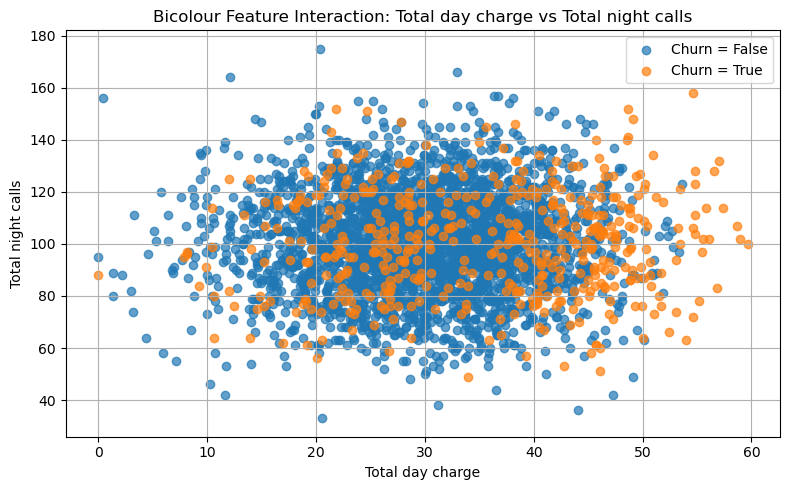

In [1]:
# Week 3 Lab Logbook — Bicolour Feature Interaction Diagram (Telecom Churn)
# SID: 2421463  -> last digit = 3, second-to-last digit = 6
# So we plot: (3) Total day charge  vs  (6) Total night calls

import pandas as pd
import matplotlib.pyplot as plt

# --- Step 1: SID digits -> feature selection ---
SID = 2421463

last_digit = SID % 10              # 3
second_last_digit = (SID // 10) % 10  # 6

# Mapping from digit to column name (as per lab sheet)
digit_to_col = {
    1: "Account length",
    2: "Total day calls",
    3: "Total day charge",
    4: "Total eve calls",
    5: "Total eve charge",
    6: "Total night calls",
    7: "Total night charge",
    8: "Total intl calls",
    9: "Total intl charge",
    0: "Customer service calls",
}

# If digits are the same, use the next number (in order) for the second feature
if last_digit == second_last_digit:
    second_last_digit = (second_last_digit + 1) % 10  # wraps 9->0

x_col = digit_to_col[last_digit]
y_col = digit_to_col[second_last_digit]

print("SID:", SID)
print("Last digit:", last_digit, "->", x_col)
print("Second-to-last digit:", second_last_digit, "->", y_col)

# --- Step 2: Load dataset ---
# Put telecom_churn.csv in the same folder as your notebook, OR provide full path.
df = pd.read_csv("telecom_churn.csv")

# --- Step 3: Make sure Churn is boolean (True/False) ---
# Common cases: True/False already, or Yes/No, or 0/1.
if df["Churn"].dtype == object:
    df["Churn"] = df["Churn"].str.strip().str.lower().map({"true": True, "false": False, "yes": True, "no": False})

# --- Step 4: Bicolour scatter plot by Churn ---
x = df[x_col]
y = df[y_col]
churn = df["Churn"]

plt.figure(figsize=(8, 5))

plt.scatter(x[churn == False], y[churn == False], label="Churn = False", alpha=0.7)
plt.scatter(x[churn == True],  y[churn == True],  label="Churn = True",  alpha=0.7)

plt.xlabel(x_col)
plt.ylabel(y_col)
plt.title(f"Bicolour Feature Interaction: {x_col} vs {y_col}")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
